current range: -7e-08, -1.6e-06
Injection integral (min and max): 1.0000000000000084e-16, -1.8349999999999998e-13
photon energy @ 9 keV: -0.2531557775003489, 464.54085171313636
Peaking time: 405 ns
Config bits: 0101011
Channel to be tested: csa


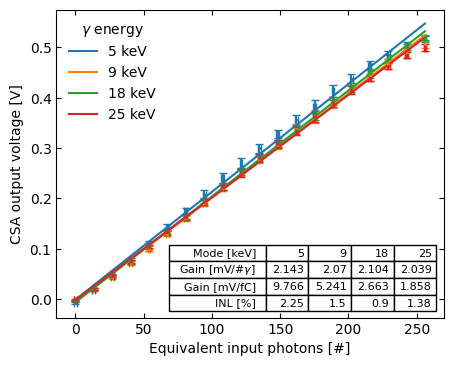

In [42]:
# CSA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from datetime import datetime
import matplotlib.colors as mcolors

import config
config.config(channel='csa',n_steps=20,cfg_bits=[0,1,0,1,0,1,1],cfg_inst=False)

colours = list(mcolors.TABLEAU_COLORS.keys())

path = [
    "G:/My Drive/PHD/FALCON/measures/transcharacteristics/csa/csa_1101011_nominal_150424_155830.tsv", # 5 keV
    "G:/My Drive/PHD/FALCON/measures/transcharacteristics/csa/csa_0101011_nominal_150424_145256.tsv", # 9 keV
    "G:/My Drive/PHD/FALCON/measures/transcharacteristics/csa/csa_1001011_nominal_150424_172552.tsv", # 18 keV
    "G:/My Drive/PHD/FALCON/measures/transcharacteristics/csa/csa_0001011_nominal_150424_151416.tsv"  # 25 keV
]
modes = [
    5,
    9,
    18,
    25
]
dfs = []
for i in range(4):
    dfs.append(pd.read_csv(path[i],sep='\t'))
datetime_str = datetime.strftime(datetime.now(), '%d%m%y_%H%M%S')

fig, ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(5)
photon_span = np.linspace(0,256,20)
for i in range(4):
    ax.errorbar(
    	photon_span,
    	dfs[i]['Voltage output average (V)'],
    	xerr=np.tile(1, dfs[i].shape[0]),
    	yerr=dfs[i]['Voltage output std (V)'],
    	fmt='s', markersize=1, capsize=3,
        color=colours[i])
ax.set_xlabel('Equivalent input photons [#]')
ax.set_ylabel(f'CSA output voltage [V]')
ax.tick_params(right=True, top=True, direction='in')

from scipy import stats
lns = []
linear_outputs = []
max_diffs = []
inls = []
for i in range(4):
    lns.append(stats.linregress(
    	#df[df['Equivalent photons'].between(eq_ph[0],eq_ph[-1])]['Equivalent photons'].astype(float),
    	photon_span,
    	dfs[i]['Voltage output average (V)'].astype(float))
    )
    linear_outputs.append(lns[i].intercept + lns[i].slope*np.linspace(0,256,20))
    ax.plot(
    	photon_span,
        linear_outputs[i],
        color=colours[i]
    )
    max_diffs.append(np.max(dfs[i]['Voltage output average (V)'] - linear_outputs[i]))
    inls.append(100 * np.abs(max_diffs[i]) / lns[i].slope / 256)

ax.table([
	['Mode [keV]',f'{modes[0]}',f'{modes[1]}',f'{modes[2]}',f'{modes[3]}'],
	['Gain [mV/#$\\gamma$]',f'{np.round(lns[0].slope*10**3,3)}',f'{np.round(lns[1].slope*10**3,3)}',f'{np.round(lns[2].slope*10**3,3)}',f'{np.round(lns[3].slope*10**3,3)}'],
	['Gain [mV/fC]',f'{np.round(lns[0].slope*10**3/modes[0]*config.conv_kev_c*10**-15,3)}',f'{np.round(lns[1].slope*10**3/modes[1]*config.conv_kev_c*10**-15,3)}',f'{np.round(lns[2].slope*10**3/modes[2]*config.conv_kev_c*10**-15,3)}',f'{np.round(lns[3].slope*10**3/modes[3]*config.conv_kev_c*10**-15,3)}'],
	['INL [%]',f'{np.round(inls[0],2)}',f'{np.round(inls[1],2)}',f'{np.round(inls[2],2)}',f'{np.round(inls[3],2)}'],
	], colWidths=[.25,.11,.11,.11,.11], loc='lower right')
ax.legend([f'{x} keV' for x in modes],
		  title=f"$\\gamma$ energy",
		  frameon=False)
plt.savefig(f'G:/My Drive/PHD/FALCON/measures/transcharacteristics/csa/summary/csa_summary_nominal_{datetime_str}.pdf',dpi=300)

current range: -7e-08, -1.125611745513866e-06
Injection integral (min and max): 1.0000000000000084e-16, -1.2657340946166391e-13
photon energy @ 9 keV: -0.2531557775003489, 320.42789883137283
Peaking time: 405 ns
Config bits: 0101011
Channel to be tested: shap


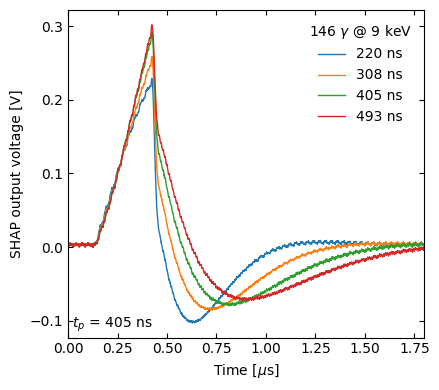

In [15]:
# SHAP
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from datetime import datetime
import matplotlib.colors as mcolors
from matplotlib.ticker import FormatStrFormatter

import config
config.config(channel='shap',n_steps=8,cfg_bits=[0,1,0,1,0,1,1],cfg_inst=False,lemo='HIGH')

colours = list(mcolors.TABLEAU_COLORS.keys())

path = [
    "G:/My Drive/PHD/FALCON/measures/transient/shap/shap_0100011_nominal_160424_102134.tsv", # 9 keV, 220 ns
    "G:/My Drive/PHD/FALCON/measures/transient/shap/shap_0100111_nominal_160424_103027.tsv", # 9 keV, 308 ns
    "G:/My Drive/PHD/FALCON/measures/transient/shap/shap_0101011_nominal_160424_105215.tsv", # 9 keV, 405 ns
    "G:/My Drive/PHD/FALCON/measures/transient/shap/shap_0101111_nominal_160424_104226.tsv"  # 9 keV, 493 ns
]
modes = [
    220,
    308,
    405,
    493
]
photon_span = np.linspace(0,256,8)
t_s = -100e-9
t_e = 1.8e-6
dfs = []
for i in range(4):
    df = pd.read_csv(path[i],sep='\t')
    dfs.append(df[df['Time (s)'].between(t_s, t_e)])
datetime_str = datetime.strftime(datetime.now(), '%d%m%y_%H%M%S')

colours = list(mcolors.TABLEAU_COLORS.keys())
fig, ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(5)

current_level_step = 4
for i in range(4):
    df = dfs[i]
    ax.plot(
		df[df['Current level step'] == current_level_step]['Time (s)']*10**6,
		df[df['Current level step'] == current_level_step]['Amplitude (V)'],
		'-', linewidth=1, color=colours[i])
ax.set_xlabel('Time [$\\mu$s]')
ax.set_ylabel(f'{config.channel_name.upper()} output voltage [V]')
yticks = ax.get_yticks()
ylim = ax.get_ylim()
ax.set_yticks(np.arange(np.round(min(yticks),1), np.round(max(yticks)+.1,1), 0.1))
ax.set_ylim(ylim)
ax.tick_params(right=True, top=True, direction='in')
ax.autoscale(enable=True, axis='x', tight=True)

ax.legend([f'{x} ns' for x in modes],
		  title=f"{int(np.round(photon_span[current_level_step]))} $\\gamma$ @ {config.photon_energy} keV",
		  frameon=False)
if config.channel_name == 'shap':
	ax.text(.01,.01,f'$t_p$ = {config.peaking_time} ns',ha='left',va='bottom',transform=ax.transAxes)
     
plt.savefig(f'G:/My Drive/PHD/FALCON/measures/transient/shap/summary/shap_summary_nominal_{datetime_str}.pdf',dpi=300)